# Deep Learning

In [6]:
!pip install tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [39 lines of output]
  Traceback (most recent call last):
    File "C:\Users\yuvar\anaconda3\envs\tf-new\lib\site-packages\packaging\requirements.py", line 36, in __init__
      parsed = _parse_requirement(requirement_string)
    File "C:\Users\yuvar\anaconda3\envs\tf-new\lib\site-packages\packaging\_parser.py", line 62, in parse_requirement
      return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
    File "C:\Users\yuvar\anaconda3\envs\tf-new\lib\site-packages\packaging\_parser.py", line 80, in _parse_requirement
      url, specifier, marker = _parse_requirement_details(tokenizer)
    File "C:\Users\yuvar\anaconda3\envs\tf-new\lib\site-packages\packaging\_parser.py", line 124, in _parse_requirement_details
      marker = _parse_requirement_marker(
    File "C:\Users\yuvar\anaconda3\envs\tf-new\lib\site-packages\packaging\_parser.py", line 145, in _parse_requ

In [7]:
!pip install scikit-learn

In [8]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [9]:
!pip install matplotlib

In [10]:
## import some basics libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
dataset = pd.read_csv("Churn_Modelling.csv")

In [12]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
## Divide the dataset into independent and dependent features
X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [14]:
X.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [15]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [16]:
#Feature Engineering 
gender = pd.get_dummies(X["Geography"],drop_first=True)

In [17]:
#Features Engineering
geography= pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [18]:
## concatenate these variable with dataframe
X= X.drop(['Geography','Gender'], axis=1)

In [19]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [20]:
X= pd.concat([X,geography,gender],axis=1)

In [21]:
##Splitting the dataset into Training set and Test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)

In [22]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [23]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [24]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [25]:
X_train.shape

(8000, 11)

In [72]:
## Part2 2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [79]:
### Lets Initialize the ANN
classifier=Sequential()

In [80]:
## Adding the input Layer
classifier.add(Dense(units=11,activation = 'relu'))

In [85]:
# Adding the first Hidden layer
classifier.add(Dense(units=7,activation='relu'))
classifier.add(Dropout(0.2))

In [90]:
## adding the second hidden layer
classifier.add(Dense(units=6, activation="relu"))
classifier.add(Dropout(0.3))

In [92]:
## Adding the output layer
classifier.add(Dense(1,activation='sigmoid'))

In [93]:
classifier.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'])

In [94]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [35]:
## Early Stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [95]:
model_history =classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7967 - loss: 0.5146 - val_accuracy: 0.7955 - val_loss: 0.4770
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7984 - loss: 0.4762 - val_accuracy: 0.7955 - val_loss: 0.4532
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7966 - loss: 0.4609 - val_accuracy: 0.7955 - val_loss: 0.4601
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7861 - loss: 0.4713 - val_accuracy: 0.7955 - val_loss: 0.4579
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7985 - loss: 0.4629 - val_accuracy: 0.7955 - val_loss: 0.4532
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8013 - loss: 0.4631 - val_accuracy: 0.7955 - val_loss: 0.4475
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7874 - loss: 0.4628 - val_accuracy: 0.7955 - val_loss: 0.4467
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7912 - loss: 0.4529 - 

In [96]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

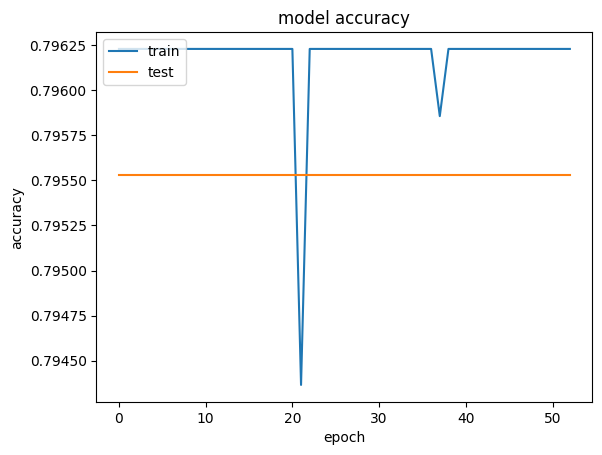

In [97]:
# Summaries histroy for  accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test',], loc='upper left')
plt.show()

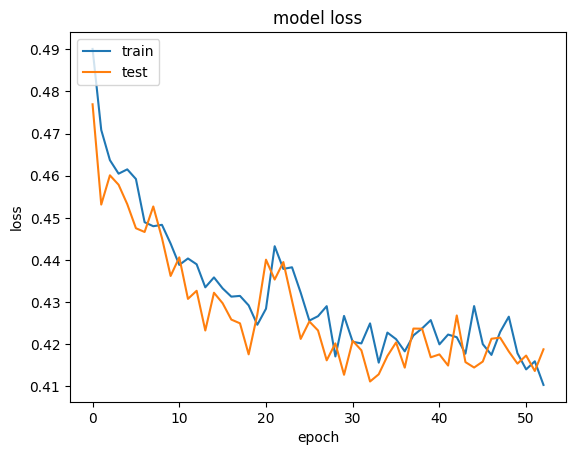

In [98]:
# Summaries histroy for  accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test',], loc='upper left')
plt.show()

In [99]:
#Part 3 - Making the Predictions and evaluating  the model

#Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [100]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1595,    0],
       [ 405,    0]], dtype=int64)

In [101]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [102]:
score

0.7975

In [103]:
# get the weights 
classifier.get_weights()

[array([[-5.48542261e-01, -9.96129572e-01,  5.13942361e-01,
         -1.14955437e+00,  7.71565497e-01,  2.36678767e+00,
         -1.55317903e+00,  1.23139098e-01,  9.24833834e-01,
         -6.22726262e-01, -1.57139674e-01],
        [ 2.66989684e+00, -2.81361079e+00,  8.47347915e-01,
         -2.31321365e-01,  4.30680752e-01, -4.02931833e+00,
         -3.67625141e+00, -5.54346514e+00,  2.39348865e+00,
          1.16046250e+00, -4.92896938e+00],
        [-3.96416843e-01,  1.43459296e+00,  1.02273655e+00,
          1.59978986e+00,  1.99521554e+00, -5.05451560e-01,
         -5.99163711e-01,  1.27959281e-01,  7.86448061e-01,
          9.24912930e-01,  6.31805778e-01],
        [-2.34311342e-01, -1.34999469e-01,  2.72209191e+00,
          1.19810395e-01, -1.98375118e+00,  6.55313075e-01,
          1.47027874e+00,  8.19638371e-01,  5.17863393e-01,
         -3.14745498e+00,  1.43928742e+00],
        [-6.49847746e+00, -1.27499437e+00,  5.11679840e+00,
         -8.10341179e-01, -5.25034964e-01, -